In [17]:
!pip install antspyx
!pip instal nibabel

!wget https://github.com/magdamd/imaging_science_tools/raw/refs/heads/patch-1/4_Image_visualization_and_registration/ants_registration/dice_test_phantom.nii.gz
!wget https://github.com/magdamd/imaging_science_tools/raw/refs/heads/patch-1/4_Image_visualization_and_registration/ants_registration/ants_registration_resampling.py

ERROR: unknown command "instal" - maybe you meant "install"
--2025-12-02 13:07:15--  https://github.com/magdamd/imaging_science_tools/raw/refs/heads/patch-1/4_Image_visualization_and_registration/ants_registration/dice_test_phantom.nii.gz
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/magdamd/imaging_science_tools/refs/heads/patch-1/4_Image_visualization_and_registration/ants_registration/dice_test_phantom.nii.gz [following]
--2025-12-02 13:07:15--  https://raw.githubusercontent.com/magdamd/imaging_science_tools/refs/heads/patch-1/4_Image_visualization_and_registration/ants_registration/dice_test_phantom.nii.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... 

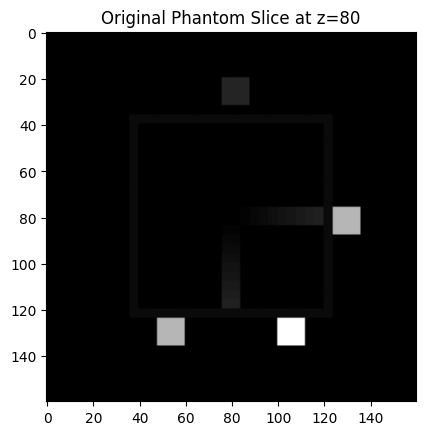

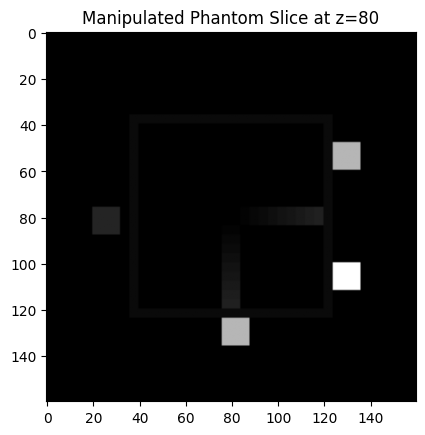

Ref shape: (160, 160, 160)
Mov shape: (160, 160, 160)
Stacked numpy shape: (160, 160, 160, 1)
ANTsImage
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (160, 160, 160, 1)
	 Spacing    : (1.0, 1.0, 1.0, 1.0)
	 Origin     : (79.5, 79.5, -79.5, 0.0)
	 Direction  : [-1.  0.  0.  0.  0. -1.  0.  0.  0.  0.  1.  0.  0.  0.  0.  1.]

Saved dice_test_phantom_registered.nii.gz
Coregistered image saved to dice_test_phantom_registered.nii.gz


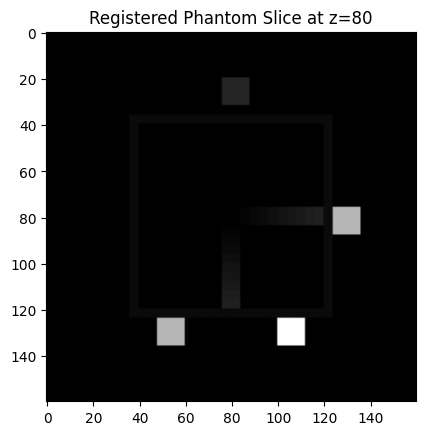

In [18]:
import matplotlib.pyplot as plt
import nibabel as nib
from ants_registration_resampling import register_resample_figures

# %% S2: Define paths

path_nii_OG = r'dice_test_phantom.nii.gz'

# %% S3: Load niftis

# original shape of this phantom is 160x160x160
nii_OG = nib.load(path_nii_OG)
data_OG = nii_OG.get_fdata()
affine_OG = nii_OG.affine

data_manipulated = nii_OG.get_fdata()
affine_manipulated = nii_OG.affine

# %% S4: Manipulate phantom

# Swap 2 axis and do the same in the affine
data_manipulated = data_manipulated.swapaxes(0,1)
affine_manipulated[[0,1],:] = affine_manipulated[[1,0],:]

# Save new nifti
nii_manipulated = nib.Nifti1Image(data_manipulated, affine_manipulated)
path_nii_manipulated = r'dice_test_phantom_manipulated.nii.gz'
nib.save(nii_manipulated, path_nii_manipulated)

# %% S5: Reload niftis as new objects

nii_OG_2 = nib.load(path_nii_OG)
nii_manipulated_2 = nib.load(path_nii_manipulated)

data_OG_2 = nii_OG_2.get_fdata()
data_manipulated_2 = nii_manipulated_2.get_fdata()

# plot a slice of the raw matrices
plt.figure()
plt.imshow(data_OG_2[:,:,80], cmap='gray')
plt.title('Original Phantom Slice at z=80')
plt.show()

plt.figure()
plt.imshow(data_manipulated_2[:,:,80], cmap='gray')
plt.title('Manipulated Phantom Slice at z=80')
plt.show()

# %% S6: perform registration
path_nii_registered = r'dice_test_phantom_registered.nii.gz'
register_resample_figures(source_path=path_nii_manipulated, target_path=path_nii_OG, output_path=path_nii_registered)

nii_registered_2 = nib.load(path_nii_registered)
data_registered_2 = nii_registered_2.get_fdata()

# plot a slice of the raw matrices
plt.figure()
plt.imshow(data_registered_2[:,:,80], cmap='gray')
plt.title('Registered Phantom Slice at z=80')
plt.show()